In [ ]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.optimizers import SGD 

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
testX=test_images
testY=test_labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=50)

Epoch 1/10
1563/1563 [==============================] - 373s 238ms/step - loss: 2.3028 - accuracy: 0.1006
Epoch 2/10
1563/1563 [==============================] - 365s 233ms/step - loss: 2.3018 - accuracy: 0.1038
Epoch 3/10
1563/1563 [==============================] - 361s 231ms/step - loss: 2.2977 - accuracy: 0.1226
Epoch 4/10
1563/1563 [==============================] - 361s 231ms/step - loss: 2.2953 - accuracy: 0.1200
Epoch 5/10
1563/1563 [==============================] - 362s 232ms/step - loss: 2.2695 - accuracy: 0.1385
Epoch 6/10
1563/1563 [==============================] - 365s 233ms/step - loss: 2.2491 - accuracy: 0.1411
Epoch 7/10
1563/1563 [==============================] - 362s 231ms/step - loss: 2.2134 - accuracy: 0.1641
Epoch 8/10
1563/1563 [==============================] - 360s 230ms/step - loss: 2.1644 - accuracy: 0.1932
Epoch 9/10
1563/1563 [==============================] - 362s 232ms/step - loss: 2.1236 - accuracy: 0.2198
Epoch 10/10
1563/1563 [=======================

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.5803 - accuracy: 0.8266


In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [ ]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  true_label=np.argmax(true_label)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("predicted : {}  ,  actual : ({})".format(class_names[predicted_label],
                                class_names[true_label]),
                                color=color)

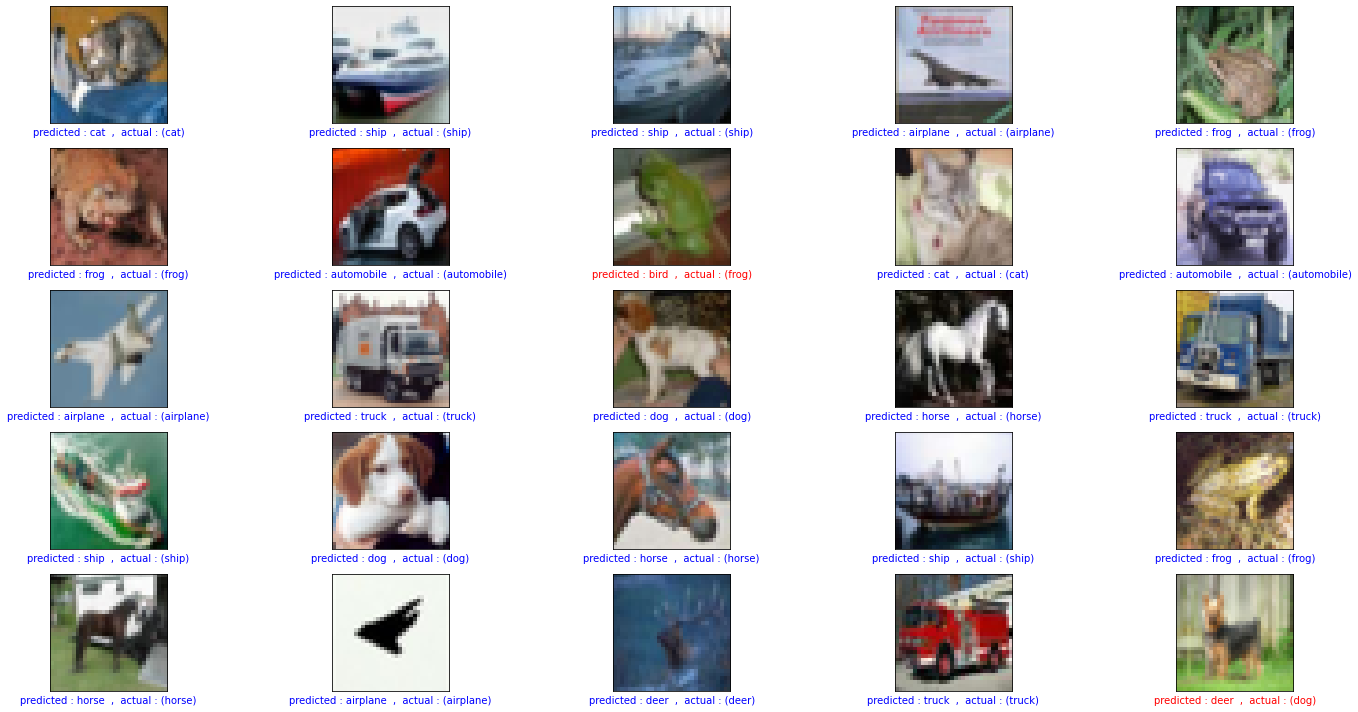

In [ ]:
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, num_cols, i+1)
  plot_image(i, predictions[i], test_labels[i], test_X[i])
plt.tight_layout()
plt.show()